In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("hospital_synth.csv", sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp_admission   315648 non-null  object 
 1   Service               315648 non-null  object 
 2   Nombre_Admissions     315648 non-null  int64  
 3   motif_admission       315648 non-null  object 
 4   gravite               315648 non-null  int64  
 5   duree_sejour_estimee  315648 non-null  float64
 6   type_lit_requis       315648 non-null  object 
 7   facteur_externe       315648 non-null  object 
 8   Lits_Occupes          315648 non-null  int64  
 9   Lits_Disponibles      315648 non-null  int64  
 10  Personnel_Present     315648 non-null  int64  
 11  Stock_EPI             315648 non-null  int64  
 12  EPI_Consommation      315648 non-null  int64  
 13  Rupture_Stock         315648 non-null  int64  
 14  Indicateur_Epidemie   315648 non-null  int64  
 15  

In [4]:
df.head(5)

,timestamp_admission,Service,Nombre_Admissions,motif_admission,gravite,duree_sejour_estimee,type_lit_requis,facteur_externe,Lits_Occupes,Lits_Disponibles,Personnel_Present,Stock_EPI,EPI_Consommation,Rupture_Stock,Indicateur_Epidemie,Type_Evenement,Indicateur_Greve,Indicateur_Canicule
0,2020-01-01 00:00:00,Urgences,7,Douleur thoracique,4,4.0,Medecine_interne,Normal,1582,218,888,79611,389,0,0,Aucun,0,0
1,2020-01-01 00:00:00,Cardio,1,Insuffisance cardiaque,3,96.0,Reanimation,Normal,1582,218,888,79611,389,0,0,Aucun,0,0
2,2020-01-01 00:00:00,Neuro,1,Autre,3,120.0,Reanimation,Normal,1582,218,888,79611,389,0,0,Aucun,0,0
3,2020-01-01 00:00:00,Infectieuses,0,Pneumonie,4,36.0,Medecine_interne,Normal,1582,218,888,79611,389,0,0,Aucun,0,0
4,2020-01-01 00:00:00,Geriatrie,1,Syndrome confusionnel,5,42.0,Medecine_interne,Normal,1582,218,888,79611,389,0,0,Aucun,0,0


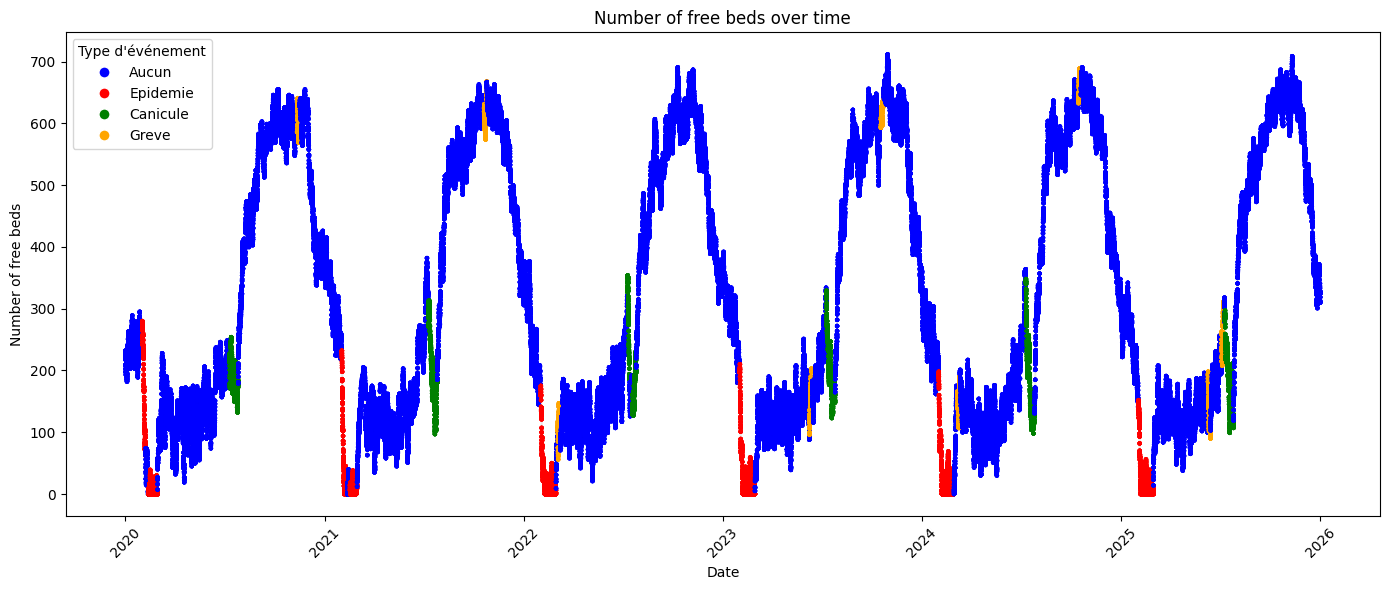

In [ ]:
# 1. Préparation des données
df['timestamp_admission'] = pd.to_datetime(df['timestamp_admission'])
df = df.sort_values(by='timestamp_admission')

# Définition des couleurs
colors = {
    'Aucun': 'blue',
    'Epidemie': 'red',
    'Canicule': 'green',
    'Greve': 'orange'
}

# 2. Création d'une colonne de couleurs (Mapping vectorisé = très rapide)
# On associe chaque événement à sa couleur directement dans le DataFrame
row_colors = df['Type_Evenement'].map(colors).fillna('blue')

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['timestamp_admission'], df['Lits_Disponibles'], color='lightgray', alpha=0.5, zorder=1)

# 3. Le Scatter Plot
# zorder=2 assure que les points sont au-dessus de la ligne grise si vous l'activez
ax.scatter(df['timestamp_admission'],
           df['Lits_Disponibles'],
           c=row_colors,
           s=10,          # Taille des points
           edgecolor='none', # Enlève le contour des points pour plus de fluidité
           zorder=2)

# Configuration du graphique
ax.set_xlabel('Date')
ax.set_ylabel('Number of free beds')
ax.set_title('Number of free beds over time')
plt.xticks(rotation=45)

# 4. Légende personnalisée
legend_elements = [Line2D([0], [0], marker='o', color='w', label=event,
                          markerfacecolor=c, markersize=8)
                   for event, c in colors.items()]
ax.legend(handles=legend_elements, title="Type d'événement")

plt.tight_layout()
plt.show()

In [6]:
print("Type événement:", df['Type_Evenement'].value_counts())

Type événement: Type_Evenement
Aucun             271152
Epidemie           22752
Canicule           13104
Greve               6480
Epidemie+Greve      1440
Greve+Canicule       720
Name: count, dtype: int64


C:\Users\ethan\AppData\Local\Temp\ipykernel_2096\3571392470.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


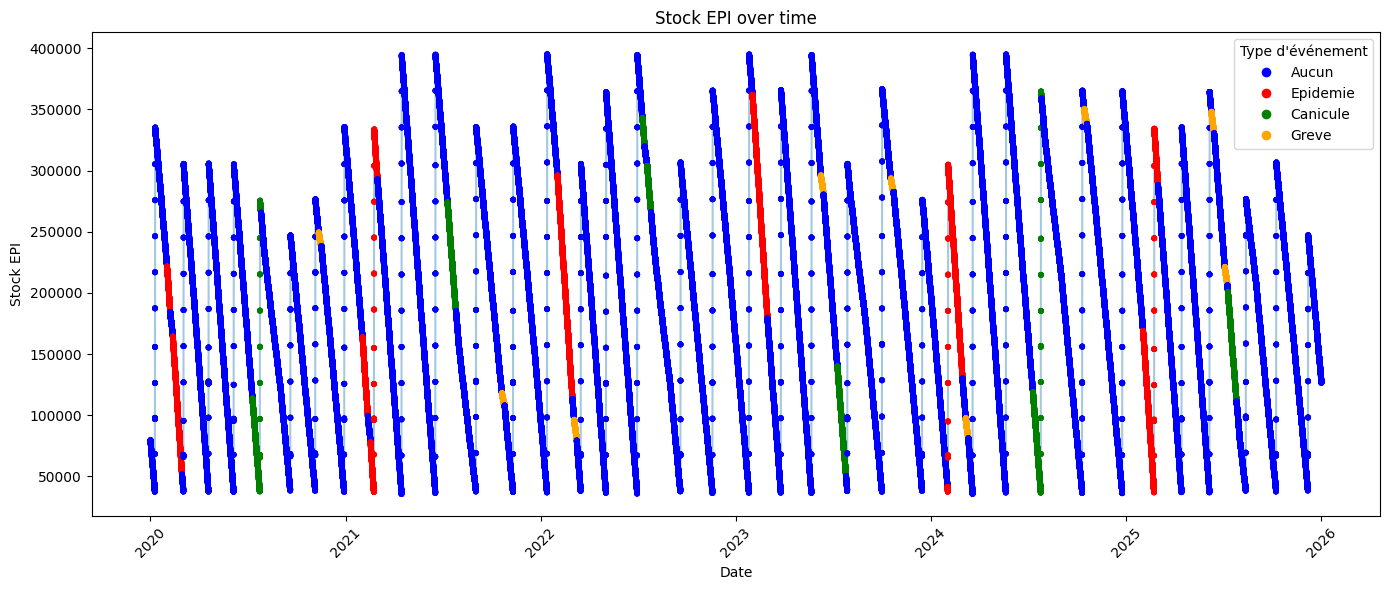

In [21]:
# Préparation des données (si nécessaire)
df['timestamp_admission'] = pd.to_datetime(df['timestamp_admission'])
df = df.sort_values(by='timestamp_admission')

# Définition des couleurs
colors = {
    'Aucun': 'blue',
    'Epidemie': 'red',
    'Canicule': 'green',
    'Greve': 'orange'
}

# --- OPTIMISATION ---
# Au lieu de la boucle for, on utilise .map() pour créer la liste de couleurs instantanément
row_colors = df['Type_Evenement'].map(colors).fillna('blue')

fig, ax = plt.subplots(figsize=(14, 6))

# 1. La courbe (Ligne)
# J'ai ajouté alpha=0.5 pour que la ligne soit légèrement transparente
# et ne masque pas trop les points de couleur.
ax.plot(df['timestamp_admission'], df['Stock_EPI'],
        color='tab:blue', alpha=0.4, zorder=1, label='Courbe Stock')

# 2. Les points (Scatter)
# s=10 comme demandé
ax.scatter(df['timestamp_admission'], df['Stock_EPI'],
           c=row_colors,
           s=10,
           zorder=2)

ax.set_xlabel('Date')
ax.set_ylabel('Stock EPI')
ax.set_title('Stock EPI over time')
plt.xticks(rotation=45)

# Création de la légende personnalisée pour les événements
legend_elements = [Line2D([0], [0], marker='o', color='w', label=event,
                          markerfacecolor=c, markersize=8)
                   for event, c in colors.items()]

ax.legend(handles=legend_elements, title="Type d'événement")

plt.tight_layout()
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_2096\3148394699.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


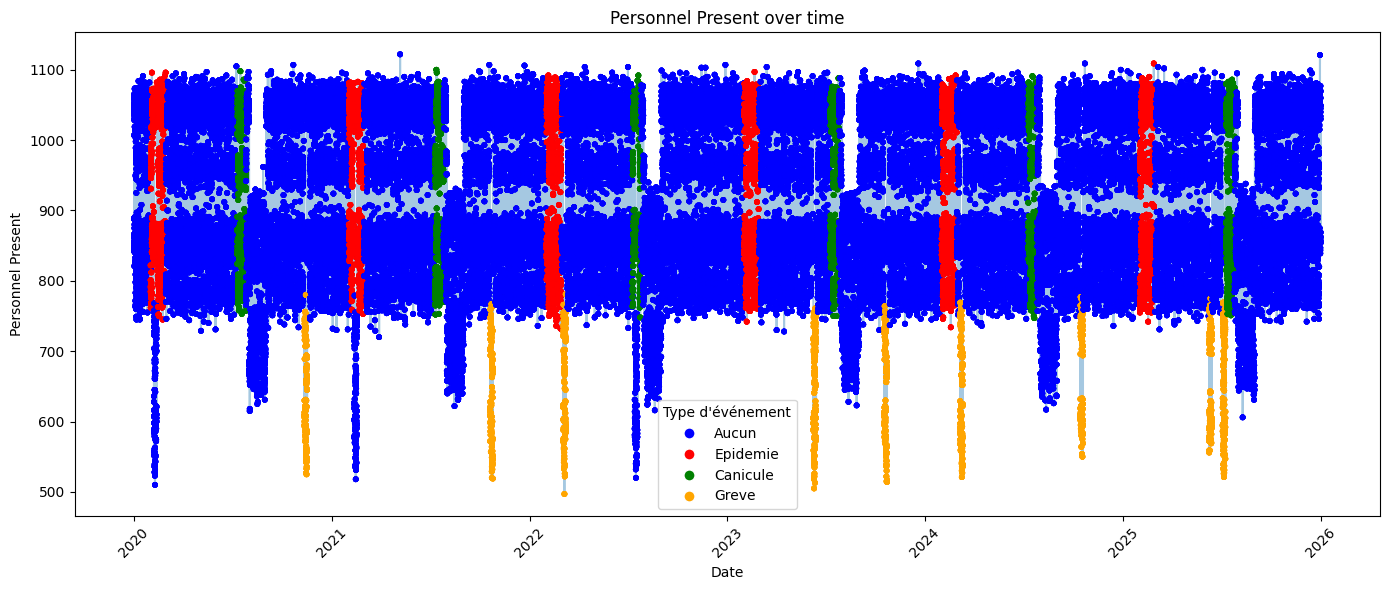

In [22]:
# Préparation des données
df['timestamp_admission'] = pd.to_datetime(df['timestamp_admission'])
df = df.sort_values(by='timestamp_admission')

# Définition des couleurs
colors = {
    'Aucun': 'blue',
    'Epidemie': 'red',
    'Canicule': 'green',
    'Greve': 'orange'
}

# --- OPTIMISATION ---
# Vectorisation de l'attribution des couleurs
row_colors = df['Type_Evenement'].map(colors).fillna('blue')

fig, ax = plt.subplots(figsize=(14, 6))

# 1. La courbe (Ligne)
# Ligne en arrière-plan (zorder=1) avec légère transparence
ax.plot(df['timestamp_admission'], df['Personnel_Present'],
        color='tab:blue', alpha=0.4, zorder=1)

# 2. Les points (Scatter)
# Points au premier plan (zorder=2) avec taille 10
ax.scatter(df['timestamp_admission'], df['Personnel_Present'],
           c=row_colors,
           s=10,
           zorder=2)

ax.set_xlabel('Date')
ax.set_ylabel('Personnel Present')
ax.set_title('Personnel Present over time')
plt.xticks(rotation=45)

# Création de la légende
legend_elements = [Line2D([0], [0], marker='o', color='w', label=event,
                          markerfacecolor=c, markersize=8)
                   for event, c in colors.items()]

ax.legend(handles=legend_elements, title="Type d'événement")

plt.tight_layout()
plt.show()

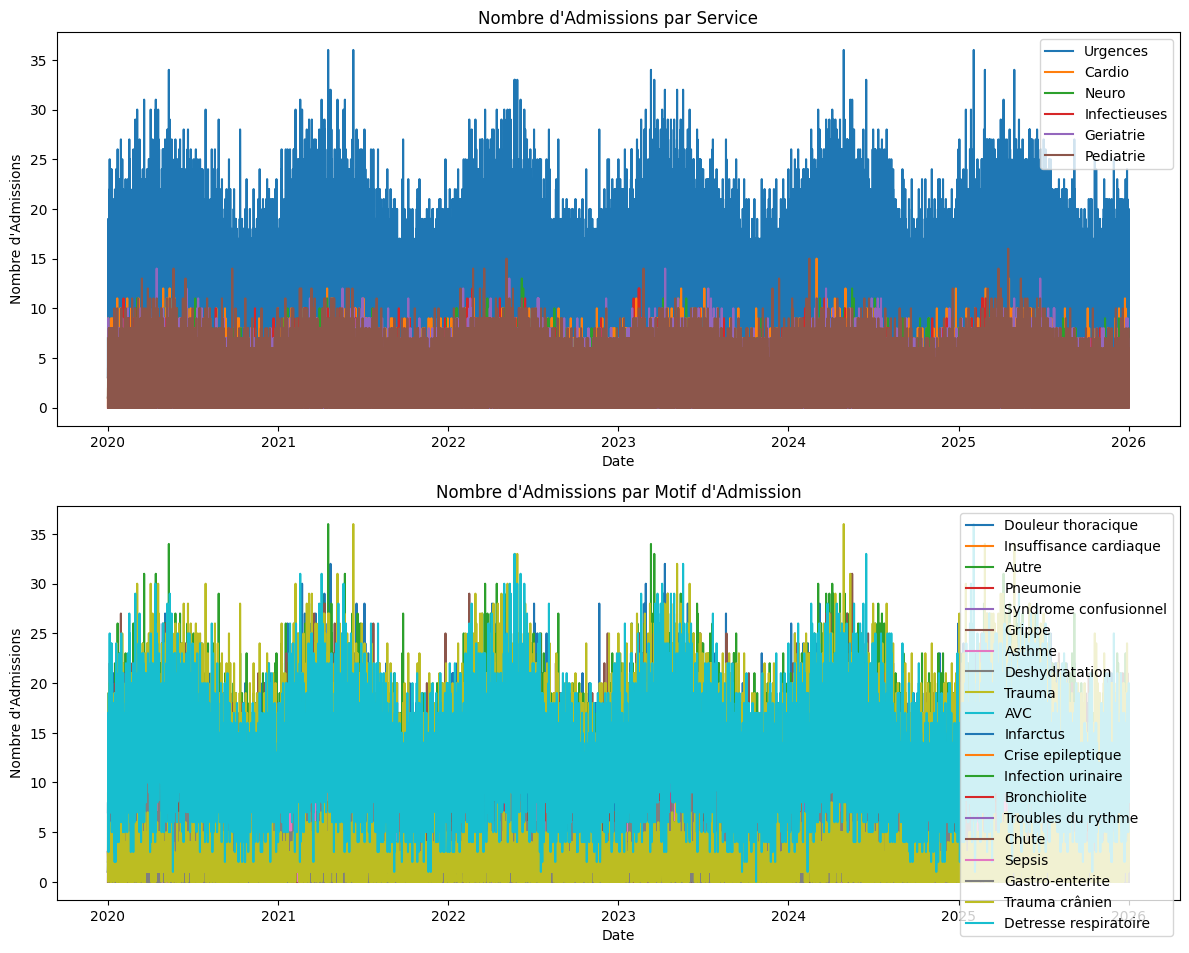

In [9]:
# 2 graph réunis en subplots 1. séparation par service 2. séparation par motif_admission
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
# First subplot: separation by service
services = df['Service'].unique()
for service in services:
    service_data = df[df['Service'] == service]
    axs[0].plot(service_data['timestamp_admission'], service_data['Nombre_Admissions'], label=service)
axs[0].set_title('Nombre d\'Admissions par Service')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Nombre d\'Admissions')
axs[0].legend()
# Second subplot: separation by motif_admission
motifs = df['motif_admission'].unique()
for motif in motifs:
    motif_data = df[df['motif_admission'] == motif]
    axs[1].plot(motif_data['timestamp_admission'], motif_data['Nombre_Admissions'], label=motif)
axs[1].set_title('Nombre d\'Admissions par Motif d\'Admission')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Nombre d\'Admissions')
axs[1].legend()
plt.tight_layout()
plt.show()

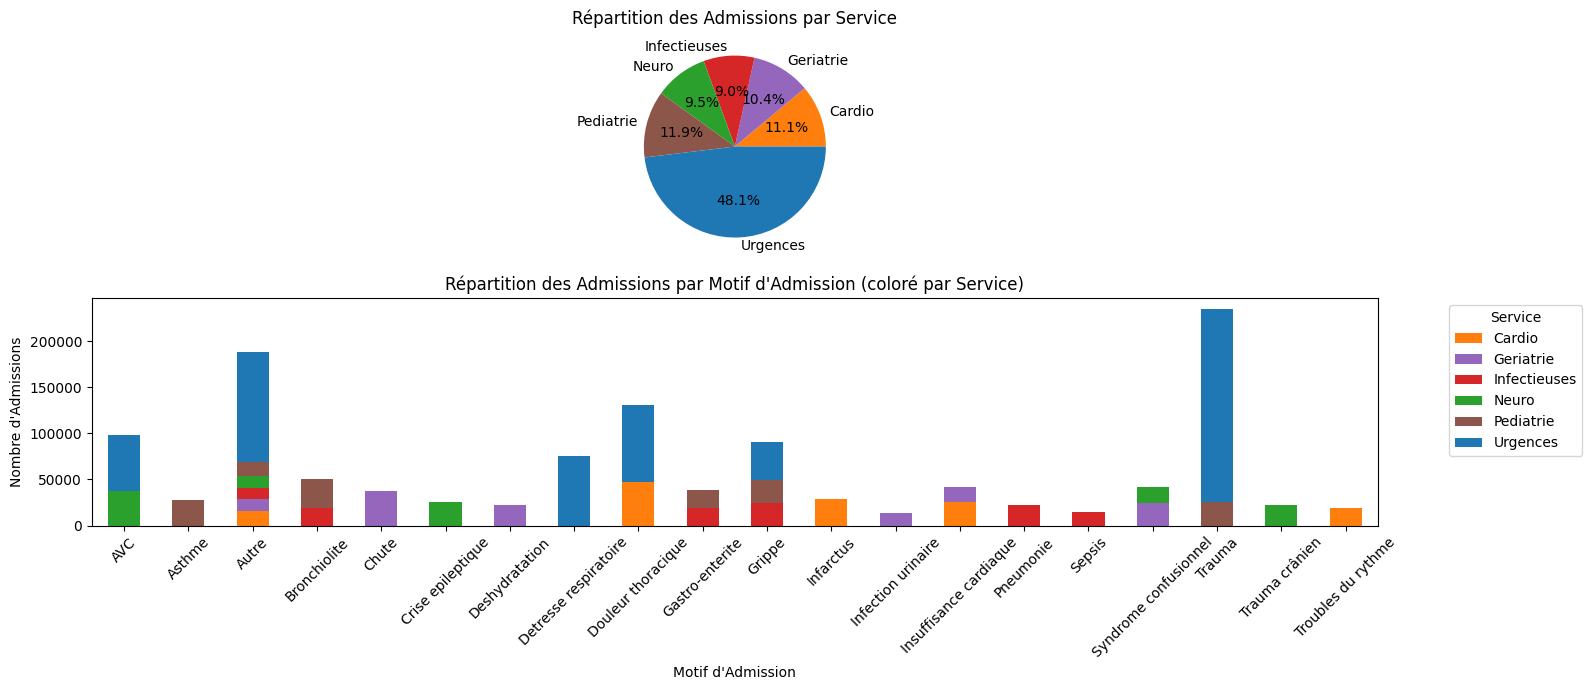

In [10]:
# on garde la même séparation par service et par motif d'admission, mais en pie chart avec les somme des admissions

# Définir une palette de couleurs pour les services
services = df['Service'].unique()
service_colors = plt.cm.tab10(range(len(services)))
service_color_map = {service: service_colors[i] for i, service in enumerate(services)}

fig, axs = plt.subplots(2, 1, figsize=(16, 7))

# First subplot: pie chart by service
service_sums = df.groupby('Service')['Nombre_Admissions'].sum()
colors_for_pie = [service_color_map[service] for service in service_sums.index]
axs[0].pie(service_sums, labels=service_sums.index, autopct='%1.1f%%', colors=colors_for_pie)
axs[0].set_title('Répartition des Admissions par Service')

# Second subplot: barres empilées par motif d'admission, colorées par service
pivot_data = df.groupby(['motif_admission', 'Service'])['Nombre_Admissions'].sum().unstack(fill_value=0)
pivot_data.plot(kind='bar', stacked=True, ax=axs[1], color=[service_color_map[s] for s in pivot_data.columns])
axs[1].set_title('Répartition des Admissions par Motif d\'Admission (coloré par Service)')
axs[1].set_xlabel('Motif d\'Admission')
axs[1].set_ylabel('Nombre d\'Admissions')
axs[1].legend(title='Service', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

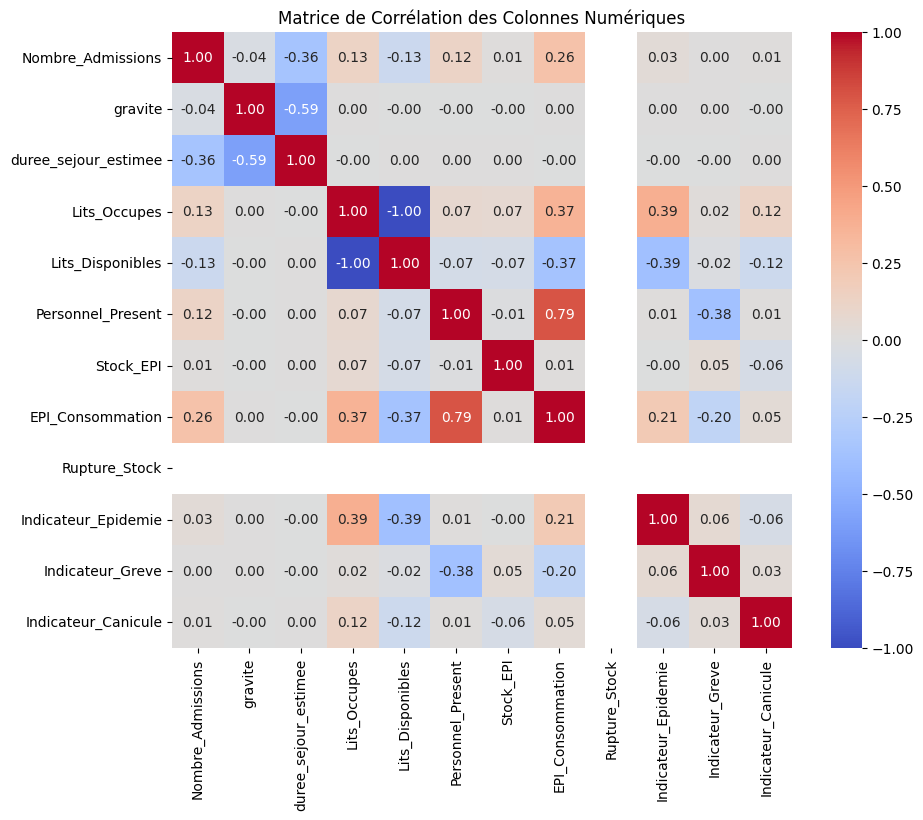

In [11]:
# matrice de corrélation entre les différentes colonnes numériques
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Colonnes Numériques')
plt.show()

In [12]:
print("Gravité:", df['gravite'].value_counts())

Gravité: gravite
3    115200
4     67329
2     65232
5     35562
1     32325
Name: count, dtype: int64


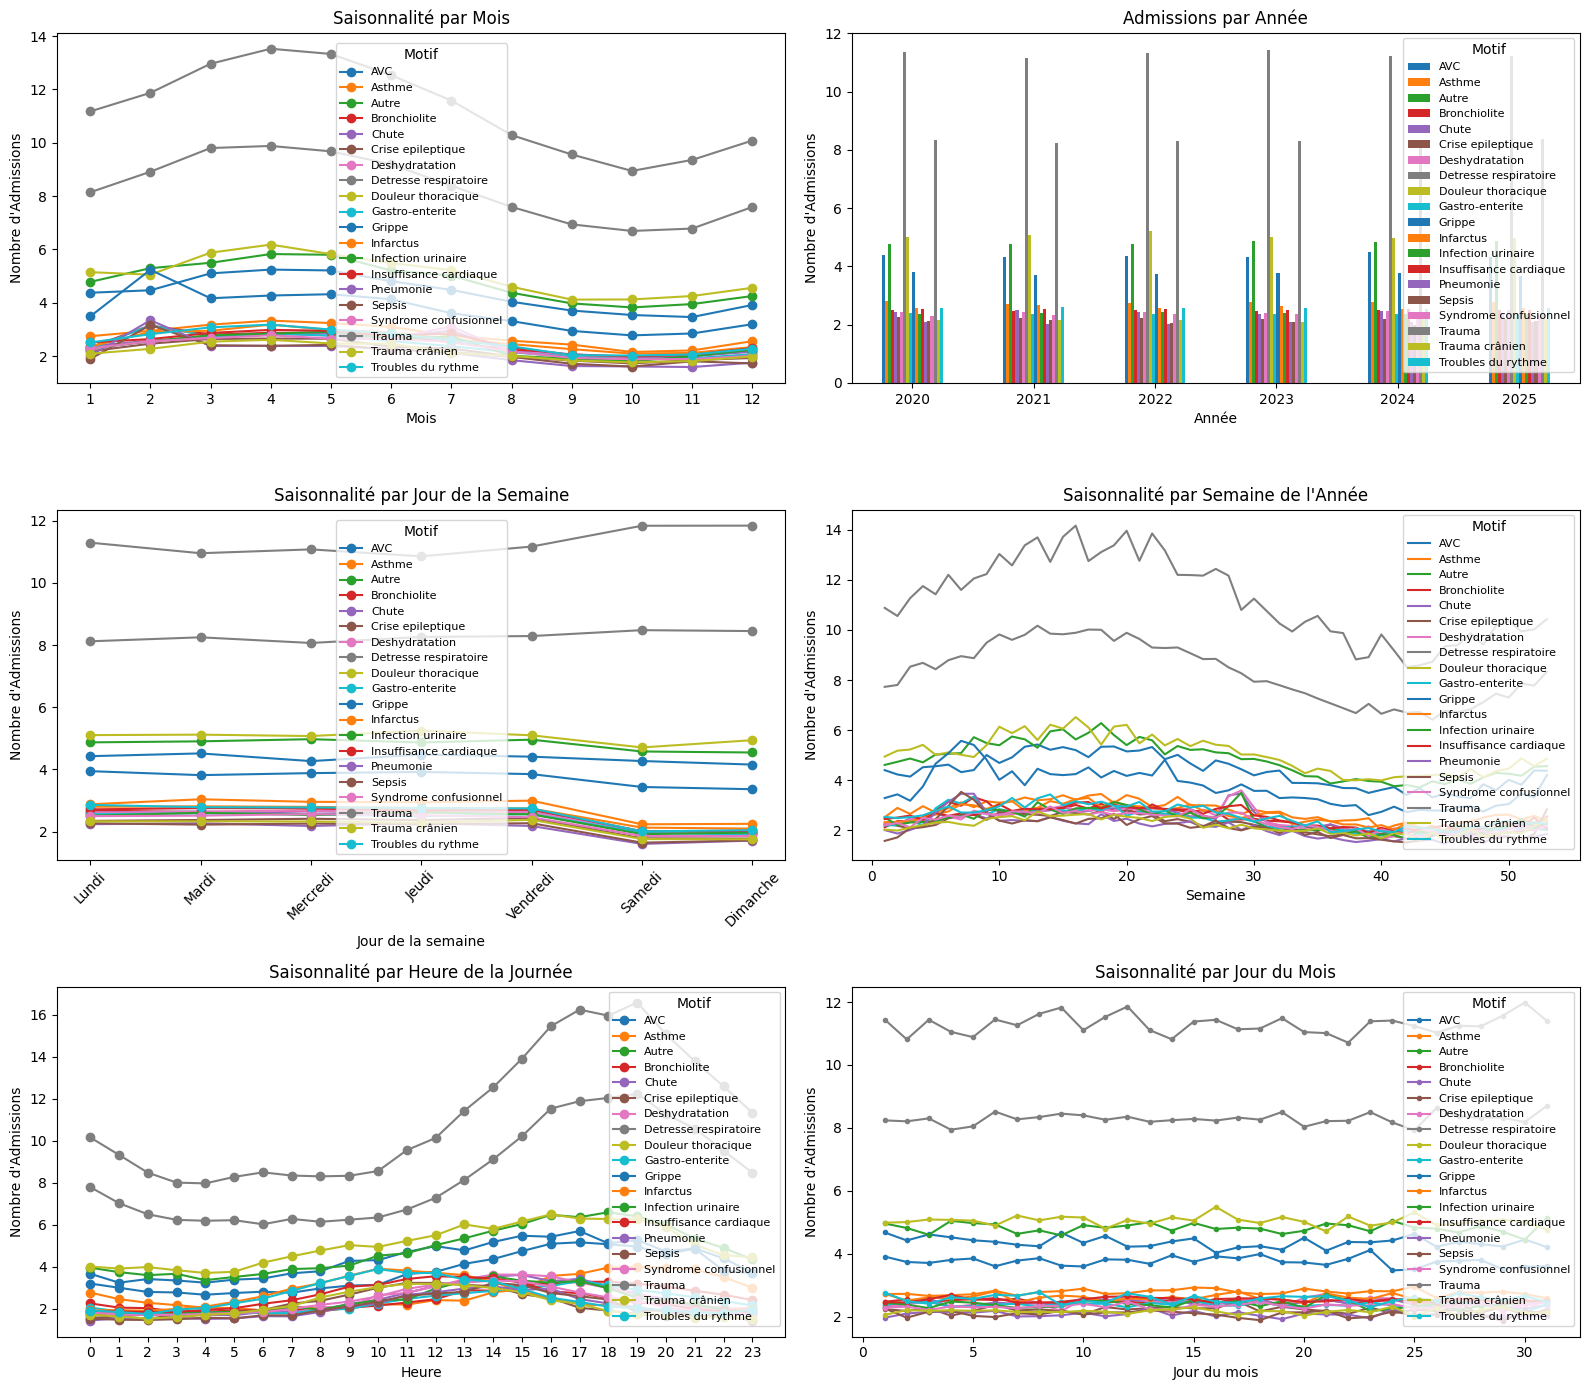

In [13]:
# étude des saisonnalités des admissions en fonction des motifs d'admission
# Découpage par mois, jour de la semaine, et heure

fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# 1. Par mois
df['month'] = df['timestamp_admission'].dt.month
monthly_admissions = df.groupby(['month', 'motif_admission'])['Nombre_Admissions'].mean().unstack(fill_value=0)
monthly_admissions.plot(kind='line', ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Saisonnalité par Mois')
axs[0, 0].set_xlabel('Mois')
axs[0, 0].set_ylabel('Nombre d\'Admissions')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].legend(title='Motif', fontsize=8)

# 2. Par année
df['year'] = df['timestamp_admission'].dt.year
yearly_admissions = df.groupby(['year', 'motif_admission'])['Nombre_Admissions'].mean().unstack(fill_value=0)
yearly_admissions.plot(kind='bar', ax=axs[0, 1], stacked=False)
axs[0, 1].set_title('Admissions par Année')
axs[0, 1].set_xlabel('Année')
axs[0, 1].set_ylabel('Nombre d\'Admissions')
axs[0, 1].legend(title='Motif', fontsize=8)
axs[0, 1].tick_params(axis='x', rotation=0)

# 3. Par jour de la semaine (0=Lundi, 6=Dimanche)
df['dayofweek'] = df['timestamp_admission'].dt.dayofweek
days_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
weekly_admissions = df.groupby(['dayofweek', 'motif_admission'])['Nombre_Admissions'].mean().unstack(fill_value=0)
weekly_admissions.plot(kind='line', ax=axs[1, 0], marker='o')
axs[1, 0].set_title('Saisonnalité par Jour de la Semaine')
axs[1, 0].set_xlabel('Jour de la semaine')
axs[1, 0].set_ylabel('Nombre d\'Admissions')
axs[1, 0].set_xticks(range(7))
axs[1, 0].set_xticklabels(days_labels, rotation=45)
axs[1, 0].legend(title='Motif', fontsize=8)

# 4. Par semaine de l'année
df['week'] = df['timestamp_admission'].dt.isocalendar().week
weekly_year_admissions = df.groupby(['week', 'motif_admission'])['Nombre_Admissions'].mean().unstack(fill_value=0)
weekly_year_admissions.plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Saisonnalité par Semaine de l\'Année')
axs[1, 1].set_xlabel('Semaine')
axs[1, 1].set_ylabel('Nombre d\'Admissions')
axs[1, 1].legend(title='Motif', fontsize=8)

# 5. Par heure de la journée
df['hour'] = df['timestamp_admission'].dt.hour
hourly_admissions = df.groupby(['hour', 'motif_admission'])['Nombre_Admissions'].mean().unstack(fill_value=0)
hourly_admissions.plot(kind='line', ax=axs[2, 0], marker='o')
axs[2, 0].set_title('Saisonnalité par Heure de la Journée')
axs[2, 0].set_xlabel('Heure')
axs[2, 0].set_ylabel('Nombre d\'Admissions')
axs[2, 0].set_xticks(range(0, 24))
axs[2, 0].legend(title='Motif', fontsize=8)

# 6. Par jour du mois
df['day'] = df['timestamp_admission'].dt.day
daily_admissions = df.groupby(['day', 'motif_admission'])['Nombre_Admissions'].mean().unstack(fill_value=0)
daily_admissions.plot(kind='line', ax=axs[2, 1], marker='.')
axs[2, 1].set_title('Saisonnalité par Jour du Mois')
axs[2, 1].set_xlabel('Jour du mois')
axs[2, 1].set_ylabel('Nombre d\'Admissions')
axs[2, 1].legend(title='Motif', fontsize=8)

plt.tight_layout()
plt.show()

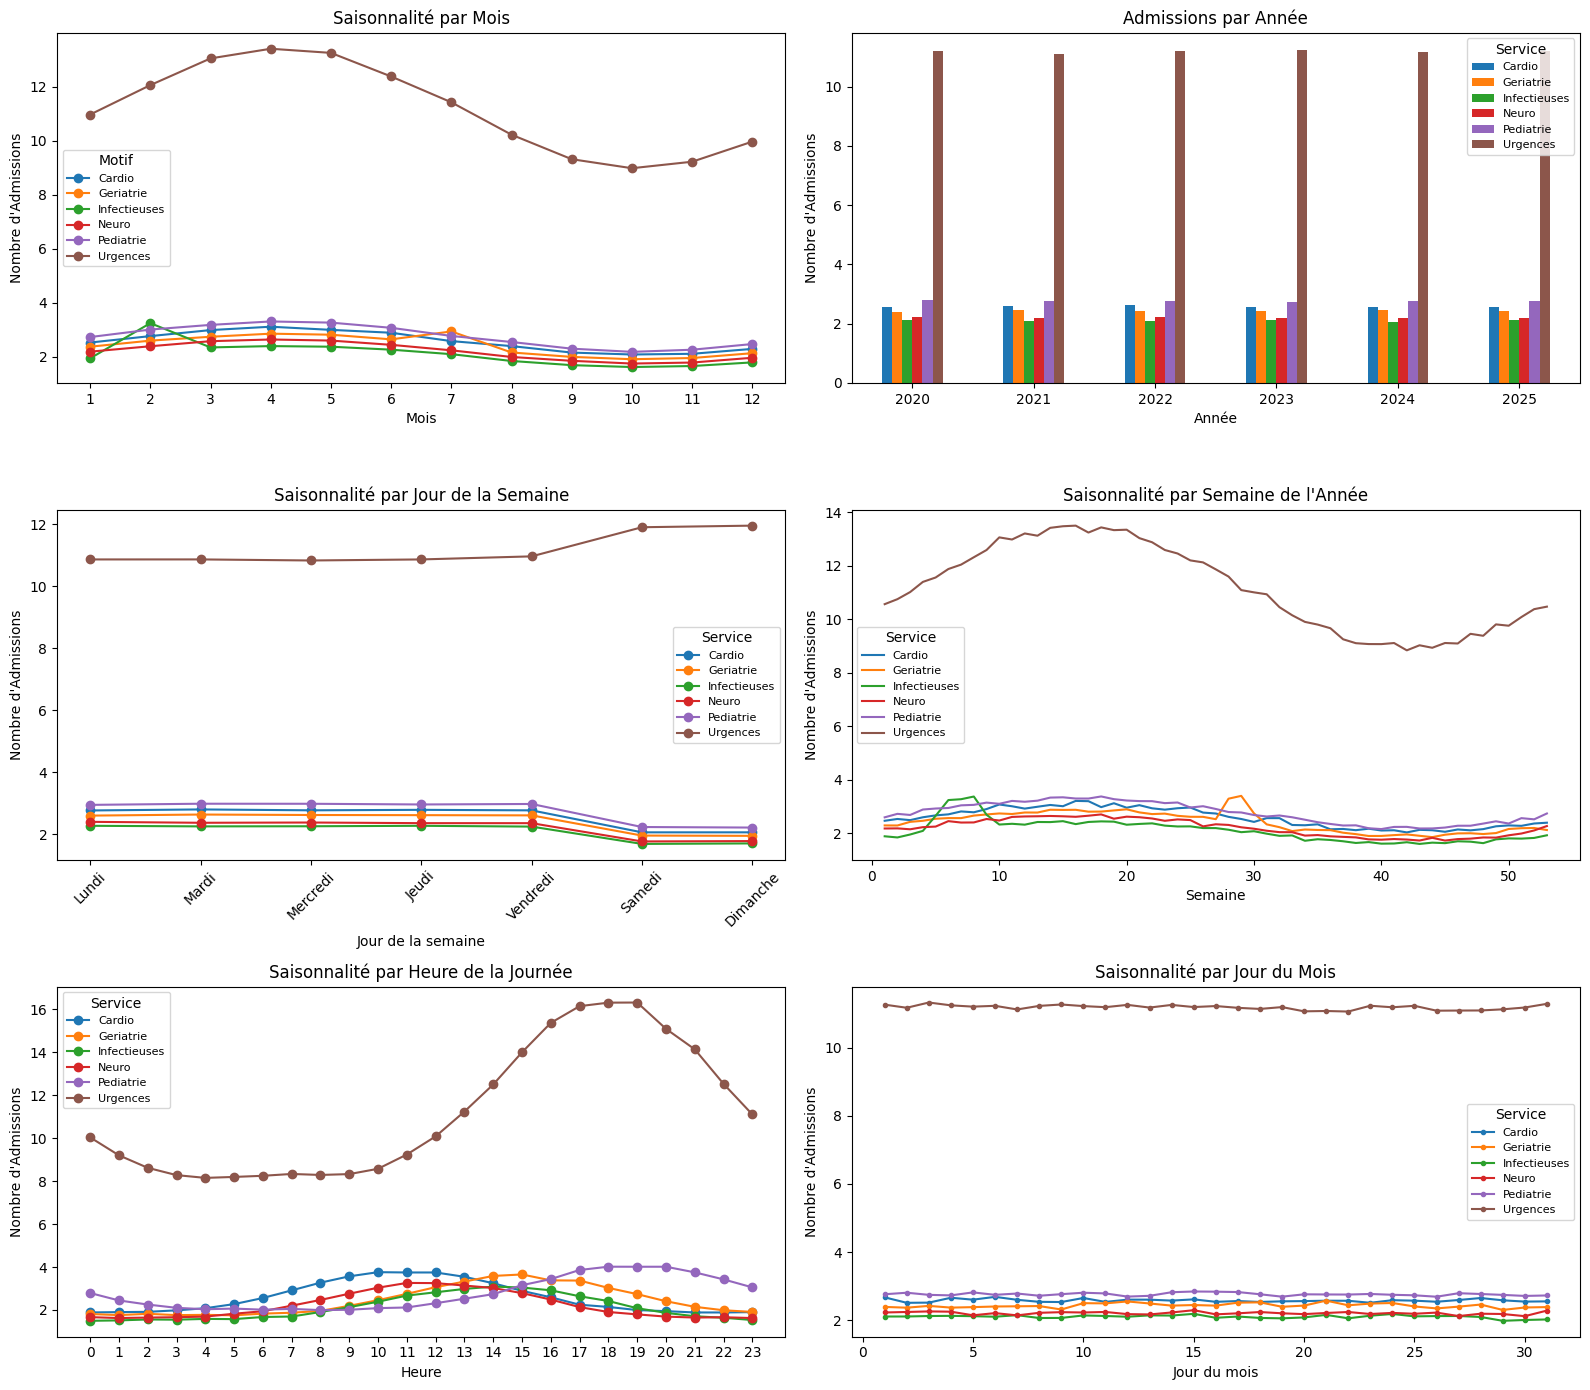

In [14]:
# étude des saisonnalités des admissions en fonction des services
# Découpage par mois, jour de la semaine, et heure

fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# 1. Par mois
df['month'] = df['timestamp_admission'].dt.month
monthly_admissions = df.groupby(['month', 'Service'])['Nombre_Admissions'].mean().unstack(fill_value=0)
monthly_admissions.plot(kind='line', ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Saisonnalité par Mois')
axs[0, 0].set_xlabel('Mois')
axs[0, 0].set_ylabel('Nombre d\'Admissions')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].legend(title='Motif', fontsize=8)

# 2. Par année
df['year'] = df['timestamp_admission'].dt.year
yearly_admissions = df.groupby(['year', 'Service'])['Nombre_Admissions'].mean().unstack(fill_value=0)
yearly_admissions.plot(kind='bar', ax=axs[0, 1], stacked=False)
axs[0, 1].set_title('Admissions par Année')
axs[0, 1].set_xlabel('Année')
axs[0, 1].set_ylabel('Nombre d\'Admissions')
axs[0, 1].legend(title='Service', fontsize=8)
axs[0, 1].tick_params(axis='x', rotation=0)

# 3. Par jour de la semaine (0=Lundi, 6=Dimanche)
df['dayofweek'] = df['timestamp_admission'].dt.dayofweek
days_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
weekly_admissions = df.groupby(['dayofweek', 'Service'])['Nombre_Admissions'].mean().unstack(fill_value=0)
weekly_admissions.plot(kind='line', ax=axs[1, 0], marker='o')
axs[1, 0].set_title('Saisonnalité par Jour de la Semaine')
axs[1, 0].set_xlabel('Jour de la semaine')
axs[1, 0].set_ylabel('Nombre d\'Admissions')
axs[1, 0].set_xticks(range(7))
axs[1, 0].set_xticklabels(days_labels, rotation=45)
axs[1, 0].legend(title='Service', fontsize=8)

# 4. Par semaine de l'année
df['week'] = df['timestamp_admission'].dt.isocalendar().week
weekly_year_admissions = df.groupby(['week', 'Service'])['Nombre_Admissions'].mean().unstack(fill_value=0)
weekly_year_admissions.plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Saisonnalité par Semaine de l\'Année')
axs[1, 1].set_xlabel('Semaine')
axs[1, 1].set_ylabel('Nombre d\'Admissions')
axs[1, 1].legend(title='Service', fontsize=8)

# 5. Par heure de la journée
df['hour'] = df['timestamp_admission'].dt.hour
hourly_admissions = df.groupby(['hour', 'Service'])['Nombre_Admissions'].mean().unstack(fill_value=0)
hourly_admissions.plot(kind='line', ax=axs[2, 0], marker='o')
axs[2, 0].set_title('Saisonnalité par Heure de la Journée')
axs[2, 0].set_xlabel('Heure')
axs[2, 0].set_ylabel('Nombre d\'Admissions')
axs[2, 0].set_xticks(range(0, 24))
axs[2, 0].legend(title='Service', fontsize=8)

# 6. Par jour du mois
df['day'] = df['timestamp_admission'].dt.day
daily_admissions = df.groupby(['day', 'Service'])['Nombre_Admissions'].mean().unstack(fill_value=0)
daily_admissions.plot(kind='line', ax=axs[2, 1], marker='.')
axs[2, 1].set_title('Saisonnalité par Jour du Mois')
axs[2, 1].set_xlabel('Jour du mois')
axs[2, 1].set_ylabel('Nombre d\'Admissions')
axs[2, 1].legend(title='Service', fontsize=8)

plt.tight_layout()
plt.show()

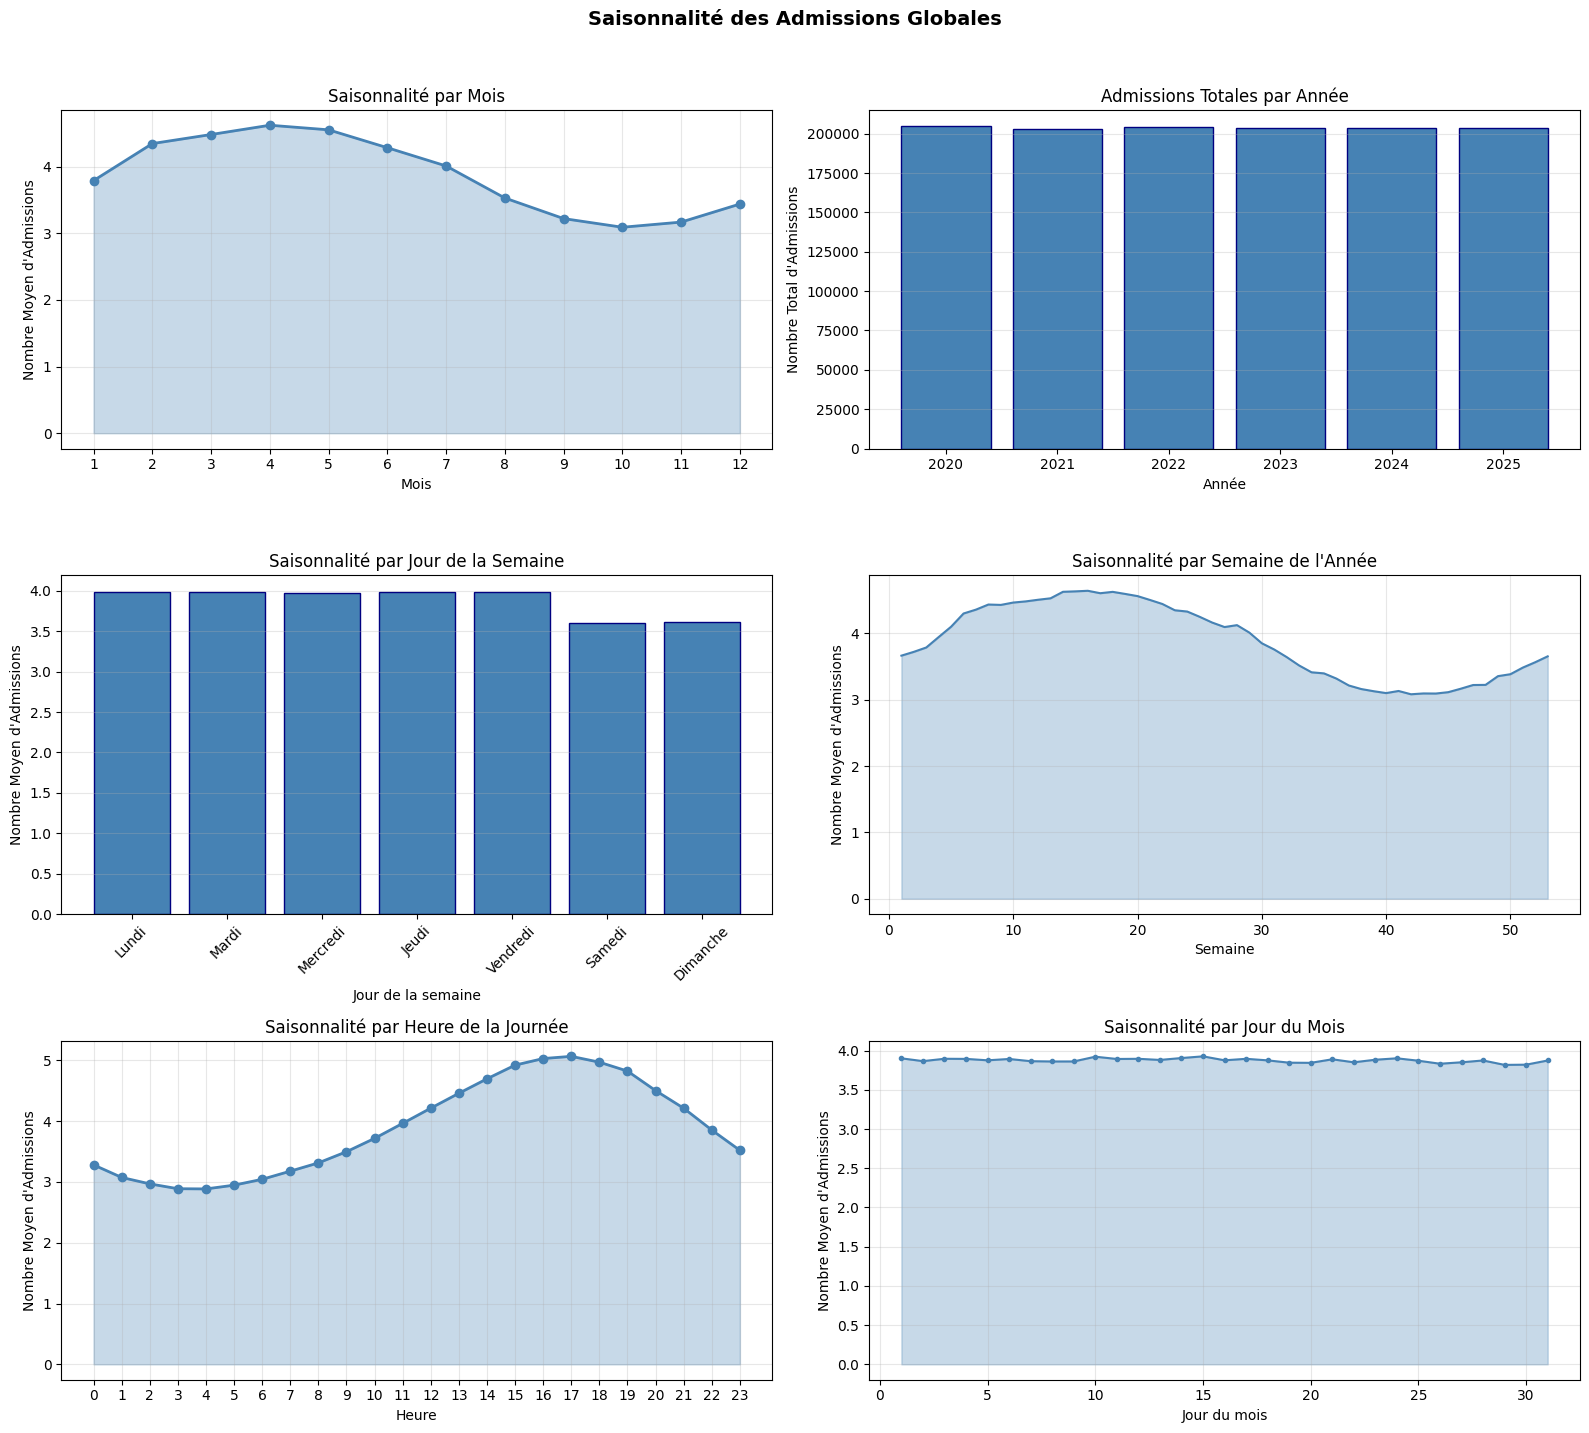

In [15]:
# étude des saisonnalités des admissions globales
# Découpage par mois, année, jour de la semaine, semaine, heure et jour du mois

fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# 1. Par mois
df['month'] = df['timestamp_admission'].dt.month
monthly_admissions = df.groupby('month')['Nombre_Admissions'].mean()
axs[0, 0].plot(monthly_admissions.index, monthly_admissions.values, marker='o', color='steelblue', linewidth=2)
axs[0, 0].fill_between(monthly_admissions.index, monthly_admissions.values, alpha=0.3, color='steelblue')
axs[0, 0].set_title('Saisonnalité par Mois')
axs[0, 0].set_xlabel('Mois')
axs[0, 0].set_ylabel('Nombre Moyen d\'Admissions')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].grid(True, alpha=0.3)

# 2. Par année
df['year'] = df['timestamp_admission'].dt.year
yearly_admissions = df.groupby('year')['Nombre_Admissions'].sum()
axs[0, 1].bar(yearly_admissions.index, yearly_admissions.values, color='steelblue', edgecolor='navy')
axs[0, 1].set_title('Admissions Totales par Année')
axs[0, 1].set_xlabel('Année')
axs[0, 1].set_ylabel('Nombre Total d\'Admissions')
axs[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Par jour de la semaine (0=Lundi, 6=Dimanche)
df['dayofweek'] = df['timestamp_admission'].dt.dayofweek
days_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
weekly_admissions = df.groupby('dayofweek')['Nombre_Admissions'].mean()
axs[1, 0].bar(weekly_admissions.index, weekly_admissions.values, color='steelblue', edgecolor='navy')
axs[1, 0].set_title('Saisonnalité par Jour de la Semaine')
axs[1, 0].set_xlabel('Jour de la semaine')
axs[1, 0].set_ylabel('Nombre Moyen d\'Admissions')
axs[1, 0].set_xticks(range(7))
axs[1, 0].set_xticklabels(days_labels, rotation=45)
axs[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Par semaine de l'année
df['week'] = df['timestamp_admission'].dt.isocalendar().week
weekly_year_admissions = df.groupby('week')['Nombre_Admissions'].mean()
axs[1, 1].plot(weekly_year_admissions.index, weekly_year_admissions.values, color='steelblue', linewidth=1.5)
axs[1, 1].fill_between(weekly_year_admissions.index, weekly_year_admissions.values, alpha=0.3, color='steelblue')
axs[1, 1].set_title('Saisonnalité par Semaine de l\'Année')
axs[1, 1].set_xlabel('Semaine')
axs[1, 1].set_ylabel('Nombre Moyen d\'Admissions')
axs[1, 1].grid(True, alpha=0.3)

# 5. Par heure de la journée
df['hour'] = df['timestamp_admission'].dt.hour
hourly_admissions = df.groupby('hour')['Nombre_Admissions'].mean()
axs[2, 0].plot(hourly_admissions.index, hourly_admissions.values, marker='o', color='steelblue', linewidth=2)
axs[2, 0].fill_between(hourly_admissions.index, hourly_admissions.values, alpha=0.3, color='steelblue')
axs[2, 0].set_title('Saisonnalité par Heure de la Journée')
axs[2, 0].set_xlabel('Heure')
axs[2, 0].set_ylabel('Nombre Moyen d\'Admissions')
axs[2, 0].set_xticks(range(0, 24))
axs[2, 0].grid(True, alpha=0.3)

# 6. Par jour du mois
df['day'] = df['timestamp_admission'].dt.day
daily_admissions = df.groupby('day')['Nombre_Admissions'].mean()
axs[2, 1].plot(daily_admissions.index, daily_admissions.values, marker='.', color='steelblue', linewidth=1.5)
axs[2, 1].fill_between(daily_admissions.index, daily_admissions.values, alpha=0.3, color='steelblue')
axs[2, 1].set_title('Saisonnalité par Jour du Mois')
axs[2, 1].set_xlabel('Jour du mois')
axs[2, 1].set_ylabel('Nombre Moyen d\'Admissions')
axs[2, 1].grid(True, alpha=0.3)

plt.suptitle('Saisonnalité des Admissions Globales', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [16]:
print("type de lit requis:", df["type_lit_requis"].value_counts())

type de lit requis: type_lit_requis
Medecine_interne    160413
Reanimation         130081
Chirurgie            25154
Name: count, dtype: int64


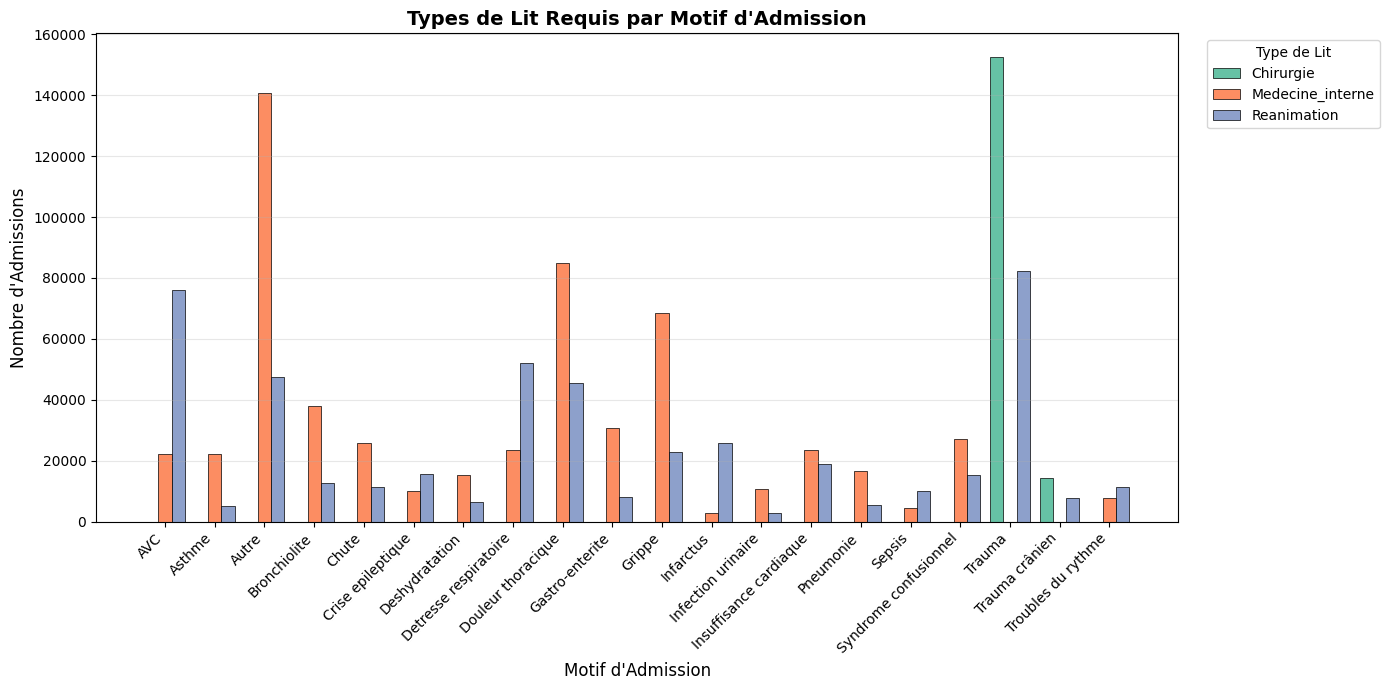

In [17]:
# Graphique comparant les types de lit requis en fonction du motif d'admission

# Créer un tableau croisé entre motif_admission et type_lit_requis
pivot_lit = df.groupby(['motif_admission', 'type_lit_requis'])['Nombre_Admissions'].sum().unstack(fill_value=0)

# Définir les positions des barres
x = np.arange(len(pivot_lit.index))
width = 0.8 / len(pivot_lit.columns)  # Largeur des barres

fig, ax = plt.subplots(figsize=(14, 7))

# Créer une barre pour chaque type de lit
colors = plt.cm.Set2(range(len(pivot_lit.columns)))
for i, (lit_type, color) in enumerate(zip(pivot_lit.columns, colors)):
    offset = (i - len(pivot_lit.columns)/2 + 0.5) * width
    bars = ax.bar(x + offset, pivot_lit[lit_type], width, label=lit_type, color=color, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Motif d\'Admission', fontsize=12)
ax.set_ylabel('Nombre d\'Admissions', fontsize=12)
ax.set_title('Types de Lit Requis par Motif d\'Admission', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(pivot_lit.index, rotation=45, ha='right')
ax.legend(title='Type de Lit', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

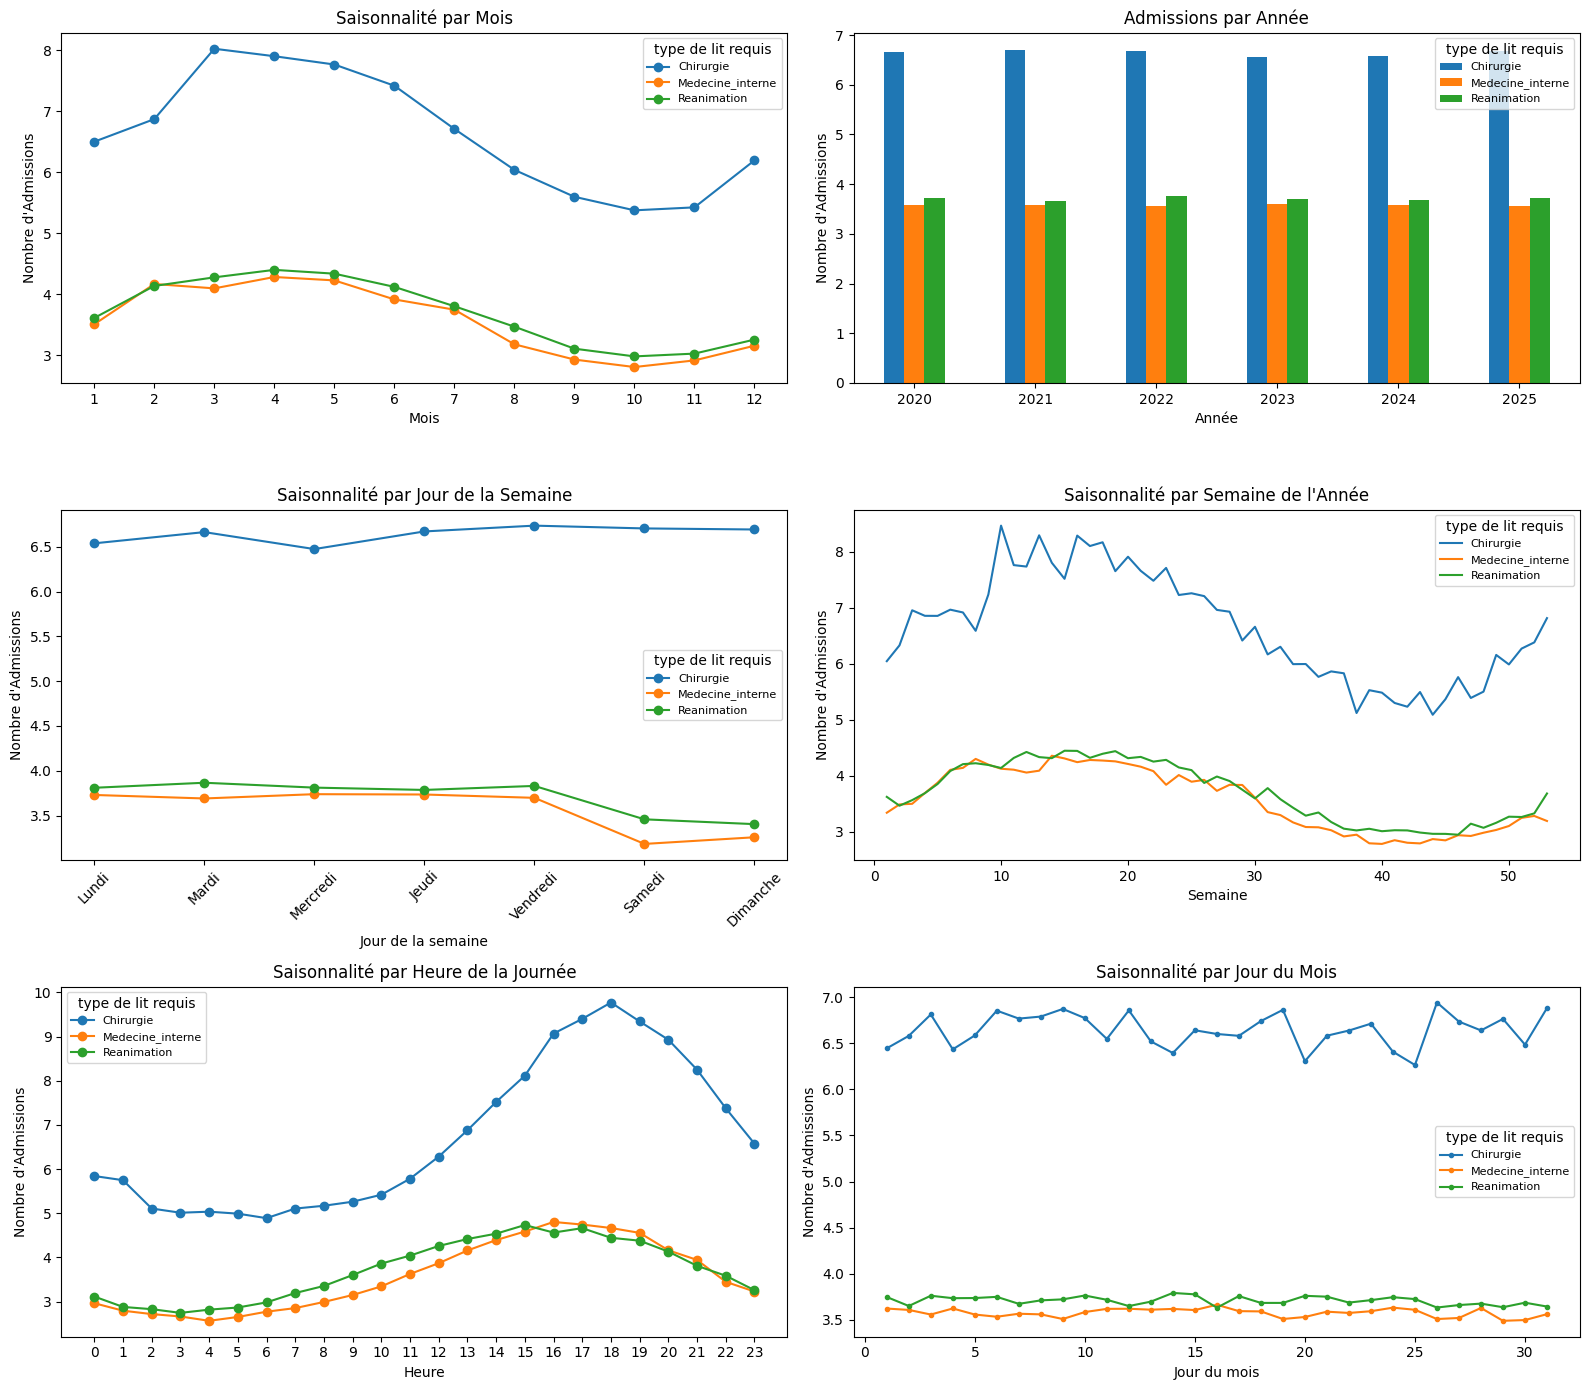

In [18]:
# étude des saisonnalités des admissions en fonction des lits nécessaire
# Découpage par mois, jour de la semaine, et heure

fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# 1. Par mois
df['month'] = df['timestamp_admission'].dt.month
monthly_admissions = df.groupby(['month', 'type_lit_requis'])['Nombre_Admissions'].mean().unstack(fill_value=0)
monthly_admissions.plot(kind='line', ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Saisonnalité par Mois')
axs[0, 0].set_xlabel('Mois')
axs[0, 0].set_ylabel('Nombre d\'Admissions')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].legend(title='type de lit requis', fontsize=8)

# 2. Par année
df['year'] = df['timestamp_admission'].dt.year
yearly_admissions = df.groupby(['year', 'type_lit_requis'])['Nombre_Admissions'].mean().unstack(fill_value=0)
yearly_admissions.plot(kind='bar', ax=axs[0, 1], stacked=False)
axs[0, 1].set_title('Admissions par Année')
axs[0, 1].set_xlabel('Année')
axs[0, 1].set_ylabel('Nombre d\'Admissions')
axs[0, 1].legend(title='type de lit requis', fontsize=8)
axs[0, 1].tick_params(axis='x', rotation=0)

# 3. Par jour de la semaine (0=Lundi, 6=Dimanche)
df['dayofweek'] = df['timestamp_admission'].dt.dayofweek
days_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
weekly_admissions = df.groupby(['dayofweek', 'type_lit_requis'])['Nombre_Admissions'].mean().unstack(fill_value=0)
weekly_admissions.plot(kind='line', ax=axs[1, 0], marker='o')
axs[1, 0].set_title('Saisonnalité par Jour de la Semaine')
axs[1, 0].set_xlabel('Jour de la semaine')
axs[1, 0].set_ylabel('Nombre d\'Admissions')
axs[1, 0].set_xticks(range(7))
axs[1, 0].set_xticklabels(days_labels, rotation=45)
axs[1, 0].legend(title='type de lit requis', fontsize=8)

# 4. Par semaine de l'année
df['week'] = df['timestamp_admission'].dt.isocalendar().week
weekly_year_admissions = df.groupby(['week', 'type_lit_requis'])['Nombre_Admissions'].mean().unstack(fill_value=0)
weekly_year_admissions.plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Saisonnalité par Semaine de l\'Année')
axs[1, 1].set_xlabel('Semaine')
axs[1, 1].set_ylabel('Nombre d\'Admissions')
axs[1, 1].legend(title='type de lit requis', fontsize=8)

# 5. Par heure de la journée
df['hour'] = df['timestamp_admission'].dt.hour
hourly_admissions = df.groupby(['hour', 'type_lit_requis'])['Nombre_Admissions'].mean().unstack(fill_value=0)
hourly_admissions.plot(kind='line', ax=axs[2, 0], marker='o')
axs[2, 0].set_title('Saisonnalité par Heure de la Journée')
axs[2, 0].set_xlabel('Heure')
axs[2, 0].set_ylabel('Nombre d\'Admissions')
axs[2, 0].set_xticks(range(0, 24))
axs[2, 0].legend(title='type de lit requis', fontsize=8)

# 6. Par jour du mois
df['day'] = df['timestamp_admission'].dt.day
daily_admissions = df.groupby(['day', 'type_lit_requis'])['Nombre_Admissions'].mean().unstack(fill_value=0)
daily_admissions.plot(kind='line', ax=axs[2, 1], marker='.')
axs[2, 1].set_title('Saisonnalité par Jour du Mois')
axs[2, 1].set_xlabel('Jour du mois')
axs[2, 1].set_ylabel('Nombre d\'Admissions')
axs[2, 1].legend(title='type de lit requis', fontsize=8)

plt.tight_layout()
plt.show()